Business Understanding

The project is created to predict annual salary based on various factors. What really affects a developer’s salary? The dataset includes a wide range of factors that allowed me to see how different factors influence earnings.

Questions of Interest
1. Does experience significantly influence developer salaries?
2. How much do geography and country impact earnings?
3. What role does education play in salary differences?
4. Does remote work lead to higher salaries?
5. Which programming languages or skills appear most often among higher earners?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import the necessary libraries

1st Section: Gather the Data

In [7]:
#Load the dataset from stack overflow dataset
raw_data= pd.read_csv("survey_results_public.csv")

In [8]:
#Load the dataset from stack overflow dataset
raw_data= pd.read_csv("survey_results_public.csv")

2nd Section: Understand the Data

In [ ]:
raw_data.head() # check the few rows in the dataset

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


What is the shape (dimension) of the data? 

In [6]:
raw_data.shape

(65437, 114)

Let's describe the data to see the important statistics

In [5]:
raw_data.describe()

,ResponseId,CompTotal,WorkExp,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,ConvertedCompYearly,JobSat
count,65437.000000,3.374000e+04,29658.000000,29324.000000,29393.000000,29411.000000,29450.000000,29448.00000,29456.000000,29456.000000,29450.000000,29445.000000,2.343500e+04,29126.000000
mean,32719.000000,2.963841e+145,11.466957,18.581094,7.522140,10.060857,24.343232,22.96522,20.278165,16.169432,10.955713,9.953948,8.615529e+04,6.935041
std,18890.179119,5.444117e+147,9.168709,25.966221,18.422661,21.833836,27.089360,27.01774,26.108110,24.845032,22.906263,21.775652,1.867570e+05,2.088259
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000
25%,16360.000000,6.000000e+04,4.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,3.271200e+04,6.000000
50%,32719.000000,1.100000e+05,9.000000,10.000000,0.000000,0.000000,20.000000,15.00000,10.000000,5.000000,0.000000,0.000000,6.500000e+04,7.000000
75%,49078.000000,2.500000e+05,16.000000,22.000000,5.000000,10.000000,30.000000,30.00000,25.000000,20.000000,10.000000,10.000000,1.079715e+05,8.000000
max,65437.000000,1.000000e+150,50.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,1.625660e+07,10.000000


Let's go over the column names

In [6]:
for columns in raw_data.columns:
    print(columns)

ResponseId
MainBranch
Age
Employment
RemoteWork
Check
CodingActivities
EdLevel
LearnCode
LearnCodeOnline
TechDoc
YearsCode
YearsCodePro
DevType
OrgSize
PurchaseInfluence
BuyNewTool
BuildvsBuy
TechEndorse
Country
Currency
CompTotal
LanguageHaveWorkedWith
LanguageWantToWorkWith
LanguageAdmired
DatabaseHaveWorkedWith
DatabaseWantToWorkWith
DatabaseAdmired
PlatformHaveWorkedWith
PlatformWantToWorkWith
PlatformAdmired
WebframeHaveWorkedWith
WebframeWantToWorkWith
WebframeAdmired
EmbeddedHaveWorkedWith
EmbeddedWantToWorkWith
EmbeddedAdmired
MiscTechHaveWorkedWith
MiscTechWantToWorkWith
MiscTechAdmired
ToolsTechHaveWorkedWith
ToolsTechWantToWorkWith
ToolsTechAdmired
NEWCollabToolsHaveWorkedWith
NEWCollabToolsWantToWorkWith
NEWCollabToolsAdmired
OpSysPersonal use
OpSysProfessional use
OfficeStackAsyncHaveWorkedWith
OfficeStackAsyncWantToWorkWith
OfficeStackAsyncAdmired
OfficeStackSyncHaveWorkedWith
OfficeStackSyncWantToWorkWith
OfficeStackSyncAdmired
AISearchDevHaveWorkedWith
AISearchDevWantTo

3rd Section: Data Cleaning

There might be duplicate rows in the data. Let's drop them

In [ ]:
raw_data['MainBranch'].drop_duplicates() # remove the same rows

0                        I am a developer by profession
3                                 I am learning to code
5                           I code primarily as a hobby
6     I am not primarily a developer, but I write co...
10    I used to be a developer by profession, but no...
Name: MainBranch, dtype: object

Only take the relevant columns to predict the salary, since using all will be inefficient

In [8]:
# Relevant column selection

relevant_cols = ['Country','Age','Employment','Industry','OrgSize','EdLevel','YearsCode','WorkExp','MainBranch','RemoteWork','LearnCode','DevType','ICorPM','JobSat','AIThreat','LanguageHaveWorkedWith','CodingActivities','ConvertedCompYearly']

df_filtered = raw_data[relevant_cols].copy()
df_filtered

,Country,Age,Employment,Industry,OrgSize,EdLevel,YearsCode,WorkExp,MainBranch,RemoteWork,LearnCode,DevType,ICorPM,JobSat,AIThreat,LanguageHaveWorkedWith,CodingActivities,ConvertedCompYearly
0,United States of America,Under 18 years old,"Employed, full-time",NaN,NaN,Primary/elementary school,NaN,NaN,I am a developer by profession,Remote,Books / Physical media,NaN,NaN,NaN,NaN,NaN,Hobby,NaN
1,United Kingdom of Great Britain and Northern I...,35-44 years old,"Employed, full-time",NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",20,17.0,I am a developer by profession,Remote,Books / Physical media;Colleague;On the job tr...,"Developer, full-stack",Individual contributor,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Hobby;Contribute to open-source projects;Other...,NaN
2,United Kingdom of Great Britain and Northern I...,45-54 years old,"Employed, full-time",NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",37,NaN,I am a developer by profession,Remote,Books / Physical media;Colleague;On the job tr...,Developer Experience,NaN,NaN,NaN,C#,Hobby;Contribute to open-source projects;Other...,NaN
3,Canada,18-24 years old,"Student, full-time",NaN,NaN,Some college/university study without earning ...,4,NaN,I am learning to code,NaN,"Other online resources (e.g., videos, blogs, f...","Developer, full-stack",NaN,NaN,No,C;C++;HTML/CSS;Java;JavaScript;PHP;PowerShell;...,NaN,NaN
4,Norway,18-24 years old,"Student, full-time",NaN,NaN,"Secondary school (e.g. American high school, G...",9,NaN,I am a developer by profession,NaN,"Other online resources (e.g., videos, blogs, f...","Developer, full-stack",NaN,NaN,NaN,C++;HTML/CSS;JavaScript;Lua;Python;Rust,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65432,NaN,18-24 years old,"Employed, full-time",NaN,2 to 9 employees,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,NaN,I am a developer by profession,Remote,"On the job training;School (i.e., University, ...",Blockchain,NaN,NaN,No,NaN,Hobby;School or academic work,NaN
65433,NaN,25-34 years old,"Employed, full-time",NaN,NaN,NaN,NaN,NaN,I am a developer by profession,Remote,NaN,NaN,NaN,NaN,NaN,NaN,Hobby;Contribute to open-source projects,NaN
65434,NaN,25-34 years old,"Employed, full-time",NaN,"1,000 to 4,999 employees","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,NaN,I am a developer by profession,In-person,"Other online resources (e.g., videos, blogs, f...","Developer, mobile",NaN,NaN,NaN,NaN,Hobby,NaN
65435,Germany,18-24 years old,"Employed, full-time",NaN,20 to 99 employees,"Secondary school (e.g. American high school, G...",5,5.0,I am a developer by profession,"Hybrid (some remote, some in-person)",On the job training;Other online resources (e....,"Developer, back-end",Individual contributor,NaN,NaN,C;C++;Go;Lua;Objective-C;Python;Rust;SQL,Hobby;Contribute to open-source projects;Profe...,NaN


Seeing where are the null values here will help us how to handle them later on

In [9]:
df_filtered.isnull().sum()

Country                    6507
Age                           0
Employment                    0
Industry                  36579
OrgSize                   17957
EdLevel                    4653
YearsCode                  5568
WorkExp                   35779
MainBranch                    0
RemoteWork                10631
LearnCode                  4949
DevType                    5992
ICorPM                    35636
JobSat                    36311
AIThreat                  20748
LanguageHaveWorkedWith     5692
CodingActivities          10971
ConvertedCompYearly       42002
dtype: int64

# Our target variable is ConvertedCompYearly 
Therefore we need to exclude the rows where this colums is null.

In [ ]:
df = df_filtered[df_filtered['ConvertedCompYearly'].notnull()]
df # we assing the final data to df

,Country,Age,Employment,Industry,OrgSize,EdLevel,YearsCode,WorkExp,MainBranch,RemoteWork,LearnCode,DevType,ICorPM,JobSat,AIThreat,LanguageHaveWorkedWith,CodingActivities,ConvertedCompYearly
72,Pakistan,18-24 years old,"Employed, full-time;Student, full-time;Indepen...",Software Development,100 to 499 employees,"Secondary school (e.g. American high school, G...",3,3.0,I am a developer by profession,"Hybrid (some remote, some in-person)",On the job training;Other online resources (e....,Data scientist or machine learning specialist,People manager,10.0,No,Assembly;Bash/Shell (all shells);C;C++;HTML/CS...,Hobby;School or academic work;Professional dev...,7322.0
374,Austria,25-34 years old,"Employed, full-time",NaN,100 to 499 employees,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",12,NaN,"I am not primarily a developer, but I write co...","Hybrid (some remote, some in-person)",Books / Physical media;Colleague;On the job tr...,Academic researcher,NaN,NaN,NaN,C;C++;Fortran;MATLAB;Python;SQL,Hobby;School or academic work;Professional dev...,30074.0
379,Turkey,35-44 years old,"Employed, full-time",Computer Systems Design and Services,20 to 99 employees,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",15,7.0,I am a developer by profession,Remote,Books / Physical media;Other online resources ...,Data scientist or machine learning specialist,Individual contributor,10.0,No,JavaScript;Julia;Python;SQL;TypeScript,Hobby;Bootstrapping a business,91295.0
385,France,35-44 years old,"Independent contractor, freelancer, or self-em...",NaN,"Just me - I am a freelancer, sole proprietor, ...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",27,NaN,I am a developer by profession,Remote,Books / Physical media;On the job training;Oth...,"Developer, back-end",NaN,NaN,NaN,Python,Hobby,53703.0
389,United States of America,25-34 years old,"Employed, full-time;Student, part-time","Transportation, or Supply Chain",10 to 19 employees,Some college/university study without earning ...,7,8.0,I am a developer by profession,Remote,Books / Physical media;Colleague;On the job tr...,Student,Individual contributor,10.0,No,HTML/CSS;JavaScript;Python;SQL;TypeScript,Hobby;School or academic work,110000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41180,Sweden,25-34 years old,"Employed, full-time",Software Development,100 to 499 employees,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,3.0,I am a developer by profession,In-person,"Other online resources (e.g., videos, blogs, f...","Developer, embedded applications or devices",Individual contributor,NaN,No,C;Python,Hobby,44640.0
41184,United States of America,45-54 years old,"Employed, full-time",Government,"1,000 to 4,999 employees","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",36,30.0,I am a developer by profession,"Hybrid (some remote, some in-person)",Books / Physical media;Other online resources ...,Project manager,People manager,9.0,NaN,Bash/Shell (all shells);C;HTML/CSS;Java;JavaSc...,Hobby;Contribute to open-source projects;Freel...,170000.0
41185,United States of America,35-44 years old,"Employed, full-time",NaN,100 to 499 employees,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",20,NaN,I am a developer by profession,Remote,"Other online resources (e.g., videos, blogs, f...","Developer, full-stack",NaN,NaN,NaN,C;C#;C++;JavaScript;PowerShell;Python;SQL,Hobby;Other (please specify):,116844.0
41186,United States of America,18-24 years old,"Student, full-time;Employed, part-time",Software Development,2 to 9 employees,Some college/university study without earning ...,5,1.0,I am a developer by profession,"Hybrid (some remote, some in-person)",Books / Physical media;On the job training;Oth...,"Developer, full-stack",Individual contributor,3.0,I'm not sure,C#;HTML/CSS;Java;JavaScript;PHP;Python,Hobby;School or academic work;Professional dev...,12000.0


Out of 65K rows there are 23.5K rows with ConvertedCompYearly is not null. 

Let's continue to clean the data

In [11]:
target_column = "ConvertedCompYearly"

# Keep only reasonable target values
y = pd.to_numeric(df[target_column], errors='coerce')

# only sensible salaries
mask = y.notna() & (y > 0) & (y < 1_000_000)

# keep valid rows
df = df.loc[mask].copy()
y = y.loc[mask]

# drop target column: "ConvertedCompYearly"
X = df.drop(columns=[target_column])

# how many rows used?
print('rows_used:', len(y))

rows_used: 23388


# Final number of rows is 23.4K

Quick Exploratory Data Analysis

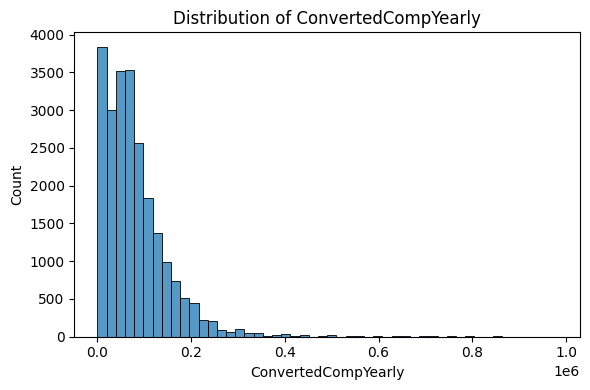

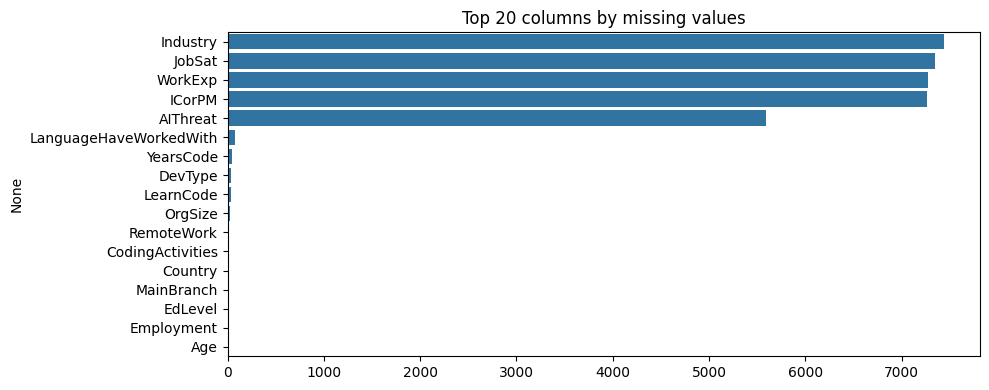

In [ ]:
#distribution of `ConvertedCompYearly`
import re, os
plt.figure(figsize=(6,4))
sns.histplot(y, bins=50)
plt.title(f'Distribution of {target_column}')
plt.tight_layout()
os.makedirs('../images', exist_ok=True)
plt.savefig('../images/target_hist.png', dpi=150)
plt.show()

# the columns with the most missing values
na_counts = X.isna().sum().sort_values(ascending=False)[:20]
plt.figure(figsize=(10,4))
sns.barplot(x=na_counts.values, y=na_counts.index)
plt.title('Top 20 columns by missing values')
plt.tight_layout()
plt.savefig('../images/missing_top20.png', dpi=150)
plt.show()

Most respondents earning relatively modest salaries and a long tail of high earners.
`Industry`, `JobSat`, `WorkExp`, and several remote-work & AI-related question have missing values

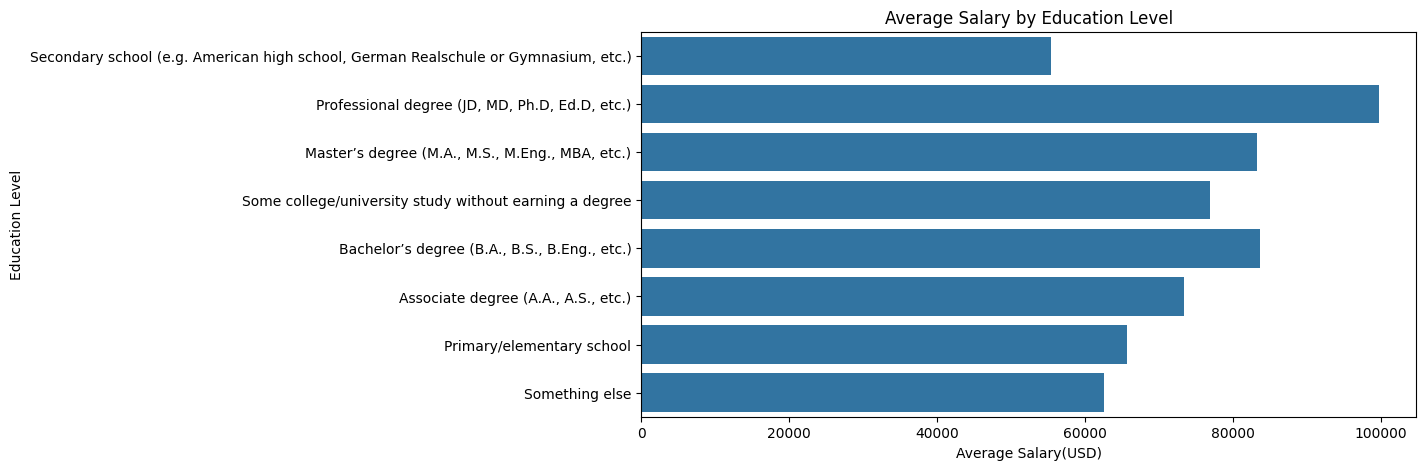

In [ ]:
# the relation between average salary and education level.
plt.figure(figsize=(10,5));
sns.barplot(data=df, x='ConvertedCompYearly', y='EdLevel', estimator=np.mean, errorbar=None )
plt.title('Average Salary by Education Level')
plt.xlabel('Average Salary(USD)')
plt.ylabel('Education Level')
plt.savefig("salary-by-education.png", dpi=300, bbox_inches='tight');

As expected the higher the education level, the higher the salary

Text(0.5, 0, 'Years of work experience')

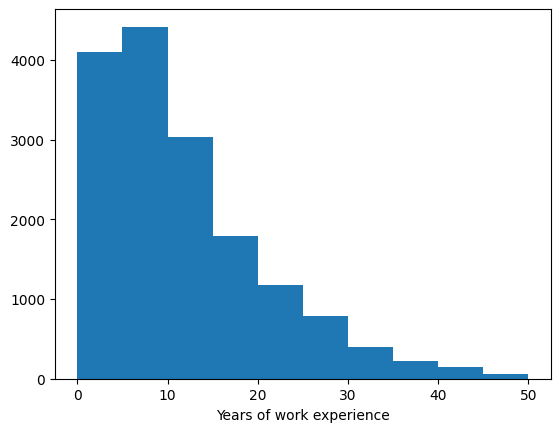

In [ ]:
#Lets see the years of work experience in the data
bins_size = 5
bins = np.arange(0, df.WorkExp.max()+bins_size, bins_size)
plt.hist(data=df, x="WorkExp", bins=bins)
plt.xlabel("Years of work experience")

Most of the respondents have between 0 to 10 years of experience

C:\Users\XXXXXX\AppData\Local\Temp\ipykernel_40216\1886112719.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  comp_avg = df.groupby("WorkExp_bin")["ConvertedCompYearly"].mean()


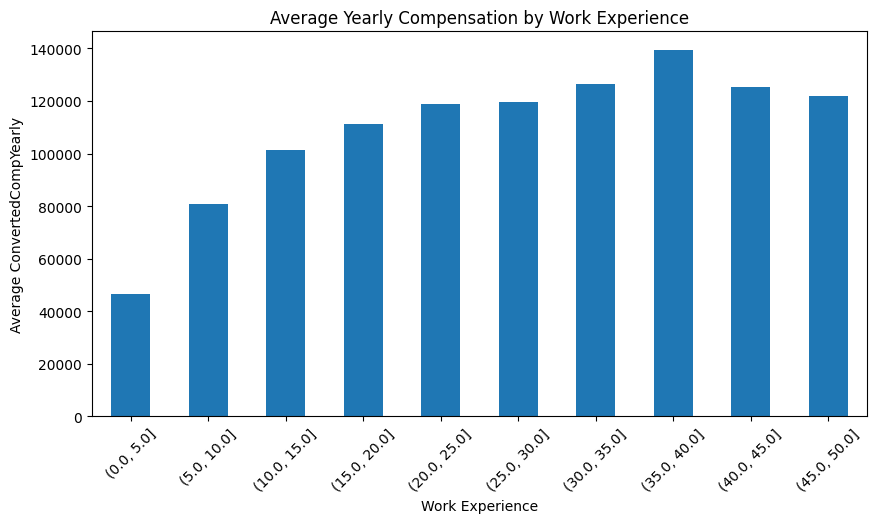

In [ ]:
#Work experience and average salary

bins_size = 5
bins = np.arange(0, df.WorkExp.max() + bins_size, bins_size)

# WorkExp in bins
df["WorkExp_bin"] = pd.cut(df["WorkExp"], bins=bins)

# each bin ConvertedCompYearly average
comp_avg = df.groupby("WorkExp_bin")["ConvertedCompYearly"].mean()

comp_avg.plot(kind="bar", figsize=(10,5))
plt.xlabel("Work Experience")
plt.ylabel("Average ConvertedCompYearly")
plt.title("Average Yearly Compensation by Work Experience")
plt.xticks(rotation=45)
plt.show()

The higher the work experience, the higher the salary. 

C:\Users\XXXXX\AppData\Local\Temp\ipykernel_40216\1466559160.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  comp_sum = df.groupby("WorkExp_bin")["ConvertedCompYearly"].sum()


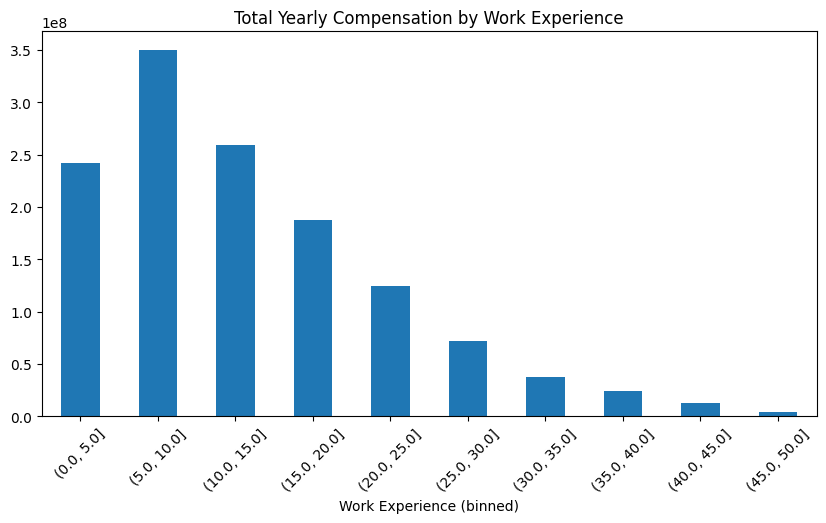

In [ ]:
#Work experience and total salary
bins_size = 5
bins = np.arange(0, df.WorkExp.max() + bins_size, bins_size)

# WorkExp’i bin’lere ayır
df["WorkExp_bin"] = pd.cut(df["WorkExp"], bins=bins)

# Her bin için ConvertedCompYearly toplamı
comp_sum = df.groupby("WorkExp_bin")["ConvertedCompYearly"].sum()

# Bar chart çiz
comp_sum.plot(kind="bar", figsize=(10,5))
plt.xlabel("Work Experience (binned)")
#plt.ylabel("Sum of ConvertedCompYearly")
plt.title("Total Yearly Compensation by Work Experience")
plt.xticks(rotation=45)
plt.show()

Total salary is higher between 5-10 Since there are much more respondents

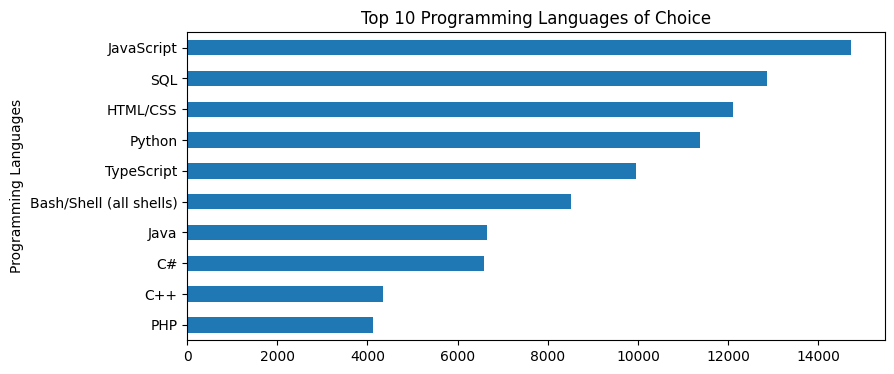

In [ ]:
#Top 10 languages
df.LanguageHaveWorkedWith.str.split(";").explode(ignore_index=True).value_counts().head(10).sort_values(ascending=True).plot(kind="barh", ylabel="Programming Languages", title="Top 10 Programming Languages of Choice", figsize=(9,4));

Most of the programmers are using Java, SQL, HTML and Python

In [16]:
df.Country.nunique()

165

There are 165 unique countries in the data

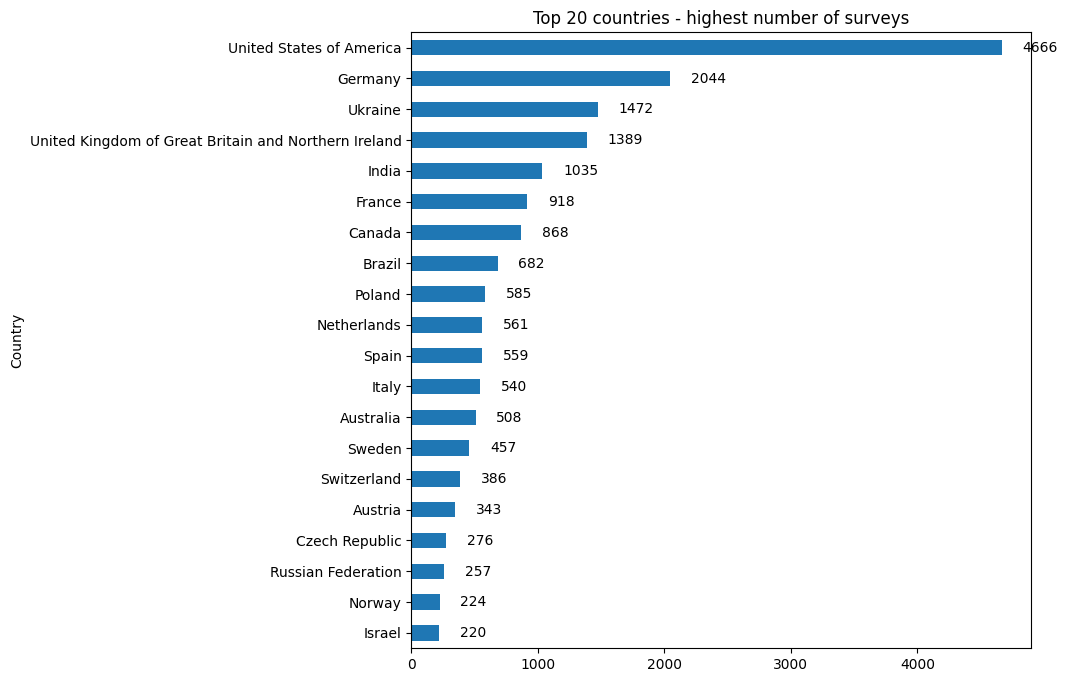

In [17]:
df_top_20 = df.Country.value_counts().head(20).sort_values(ascending=True)

ax1 = df_top_20.plot(kind="barh", figsize=(8,8), title="Top 20 countries - highest number of surveys")

for i, v in enumerate(df_top_20):
    ax1.annotate(str(v), (v, i), textcoords="offset points", xytext=(15, -3), color="Black");

Most of the responses are from USA, and other developed countries

Text(0.5, 1.0, 'Log Distribution of ConvertedCompYearly')

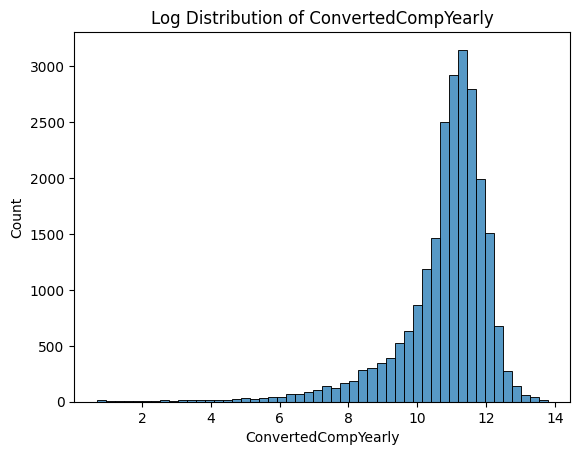

In [18]:
sns.histplot(np.log1p(y), bins=50)
plt.title(f'Log Distribution of {target_column}')

A log transformation (`np.log1p`) turns the heavily right-skewed raw salary distribution into a much more symmetric, bell-like shape — common for income data and helpful for modeling.  
This makes patterns clearer and aligns better with assumptions in regression/ML pipelines.

4th Section: Modelling

Build a model to predict the annual salary

In [19]:
# rebuild the preprocessing and pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error

In [ ]:
#split the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [21]:
# column lists on the new feature set
num_cols = X.select_dtypes(include=['number']).columns.tolist()
cat_cols = [c for c in X.columns if c not in num_cols]

numeric_pipe = Pipeline([("imputer", SimpleImputer(strategy="median"))])
categorical_pipe = Pipeline([("imputer", SimpleImputer(strategy="most_frequent")), ("ohe", OneHotEncoder(handle_unknown="ignore"))])
preprocess = ColumnTransformer([ ("num", numeric_pipe, num_cols), ("cat", categorical_pipe, cat_cols)])

Using linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#create the linearregression model and check the scores 

lin = Pipeline([("prep", preprocess), ("model", LinearRegression())])

lin.fit(X_train, y_train)
y_pred_lin = lin.predict(X_test)
rmse = np.sqrt (mean_squared_error(y_test, y_pred_lin))


print("Linear Regression")
print(f"r^2: {r2_score(y_test, y_pred_lin):.3f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_lin):,.2f}")
print(f"RMSE: {rmse:,.2f}")

Linear Regression
r^2: 0.371
MAE: 35,464.20
RMSE: 62,735.18


A **scikit-learn Pipeline** combines preprocessing (handling missing values, encoding categoricals, scaling, etc.) with a basic `LinearRegression` model to predict `ConvertedCompYearly` (annual compensation in USD) from developer features like education, experience, country, tech stack, and more.
 
On the test set, the model achieves:
- **R² = 0.371** → explains about 37% of the variance in salaries (decent starting point for linear assumptions, but leaves substantial unexplained variation due to non-linear effects, interactions, and outliers in pay).
- **MAE ≈ $35,464** → on average, predictions miss the true salary by roughly $35k.
- **RMSE ≈ $62,735** → larger because it penalizes bigger errors more heavily (typical in salary data with long tails of high earner

Random Forest

In [31]:
# Model (Random Forest)
model = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1)

#intead of manual, clean one clean line
pipe = Pipeline([("prep", preprocess), ("model", model)])

#Fit on training set
pipe.fit(X_train, y_train)

# Predict on test set and evaluate
y_pred = pipe.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt (mean_squared_error(y_test, y_pred))

print(f"r^2: {r2:.3f}")
print(f"MAE: {mae:,.2f}")
print(f"RMSE: {rmse:,.2f}")

r^2: 0.445
MAE: 30,308.07
RMSE: 58,942.15


Switched to a **RandomForestRegressor** (200 trees, random_state=42, parallelized with n_jobs=-1) inside the same preprocessing Pipeline to capture non-linear relationships and feature interactions that linear regression missed — key for salary data influenced by country, experience level, tech stack, education, and more.
 
- **R² = 0.445** → explains about 44.5% of the variance in `ConvertedCompYearly` (a solid \~7–8 percentage point gain over linear regression's 0.371, showing the benefit of ensemble tree methods).
- **MAE ≈ $30,308** → average prediction error dropped by roughly $5,156 compared to linear regression.
- **RMSE ≈ $58,942** → still high due to the inherent skewness and outliers in developer salaries, but reduced from $62,735.

In [24]:
n, p = X_train.shape
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print("Adjusted R²:", adj_r2)

Adjusted R²: 0.444258862272091


To account for the number of predictors (and avoid over-optimism from plain R² with many features after one-hot encoding), the **adjusted R²** is calculated as:
 
Adjusted R² ≈ 0.445  

5th Section: Result

C:\Users\XXXXX\AppData\Local\Temp\ipykernel_40216\1278593155.py:14: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


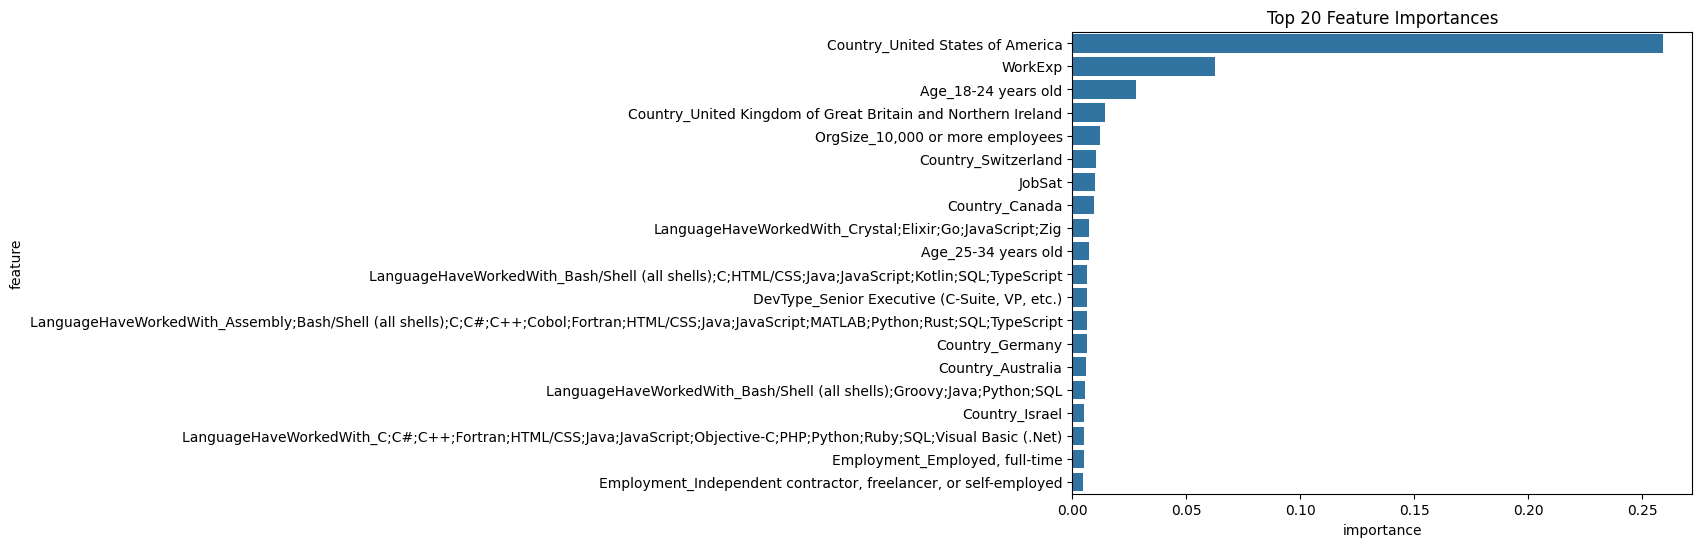

In [25]:
# Feature importances (top20)
prep = pipe.named_steps['prep']
ohe = prep.named_transformers_['cat'].named_steps['ohe'] if 'cat' in prep.named_transformers_ else None
num_names = num_cols
cat_names = list(ohe.get_feature_names_out(cat_cols)) if ohe is not None else []
all_names = num_names + cat_names
importances = pipe.named_steps['model'].feature_importances_

imp_df = pd.DataFrame({'feature': all_names, 'importance': importances}).sort_values('importance', ascending=False).head(20)

plt.figure(figsize=(8,6))
sns.barplot(data=imp_df, x='importance', y='feature')
plt.title('Top 20 Feature Importances') 
plt.tight_layout()
plt.savefig('../images/feature_importances_top20.png', dpi=150)
plt.show()

The bar plot of **top 20 feature importances** (from `RandomForestRegressor.feature_importances_`) reveals what the model relies on most to predict `ConvertedCompYearly`:

- **Country: United States** dominates by far (highest importance \~0.25), confirming that location — especially working in high-cost, high-pay markets like the US — is the single biggest driver of reported developer salaries in survey data.
- **WorkExp** (years of professional experience) ranks second, aligning with real-world trends where pay strongly correlates with seniority.
- Other top contributors include:
  - Specific age brackets (e.g., **Age 18-24**, **Age 25-34** — often proxies for early/mid-career stages).
  - High-pay countries (**United Kingdom**, **Switzerland**, **Canada**, **Germany**, **Australia**).
  - Large organization size (**10,000+ employees**).
  - Job satisfaction (**JobSat**).
  - Certain tech stacks/languages (e.g., combinations involving JavaScript, Python, Bash/Shell, etc., though individual languages appear lower due to multi-select encoding splitting importance).

**Key takeaway**: The model has learned realistic economic drivers, but the heavy reliance on Country highlights why salary prediction remains challenging without it — and why global/remote roles can vary wildly.